In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
!pip install keras

In [ ]:
import keras
import tensorflow as tf


In [ ]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Alphabets_data.csv to Alphabets_data (1).csv


In [ ]:
df=pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
#Data Exploration and Preprocessing

In [ ]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
#Model Implementationv

In [ ]:
target=df[['letter']]
target

,letter
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [ ]:
target=pd.get_dummies(target)
target

,letter_A,letter_B,letter_C,letter_D,letter_E,letter_F,letter_G,letter_H,letter_I,letter_J,...,letter_Q,letter_R,letter_S,letter_T,letter_U,letter_V,letter_W,letter_X,letter_Y,letter_Z
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
features=df.drop(['letter'],axis=1)
features

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


<Axes: >

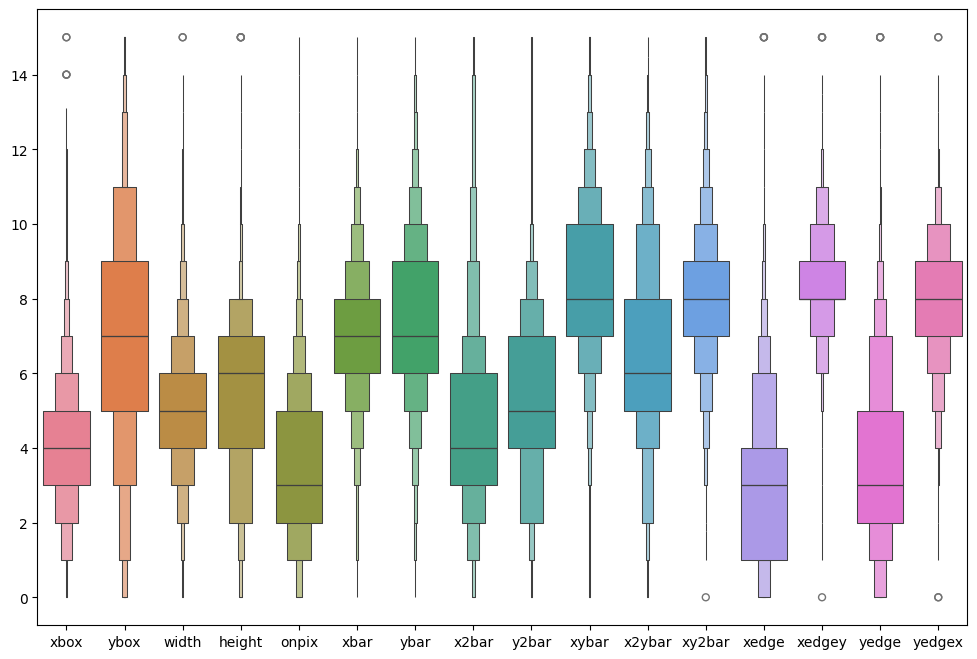

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxenplot(df )

In [ ]:

def removal_box_plot(df, column, threshold):

    sns.boxplot(df[column])

    plt.title(f'Original Box Plot of {column}')

    plt.show()


    removed_outliers = df[df[column] <= threshold]


    sns.boxplot(removed_outliers[column])

    plt.title(f'Box Plot without Outliers of {column}')

    plt.show()

    return removed_outliers

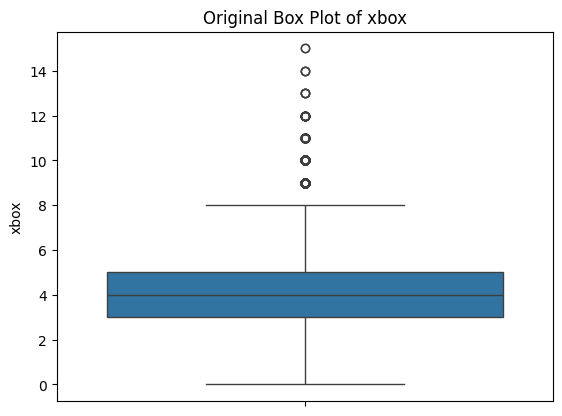

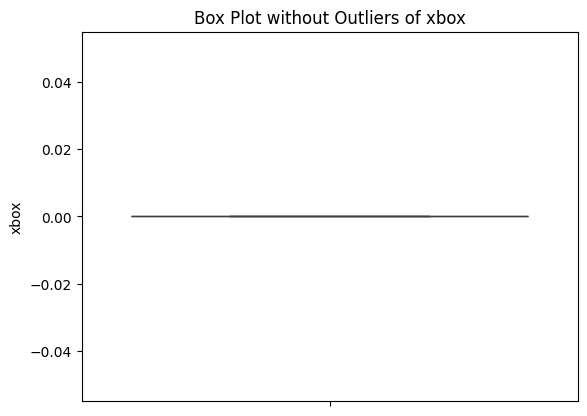

In [ ]:
threshold_value=0.12
no_outliers=removal_box_plot(df,'xbox',threshold_value)

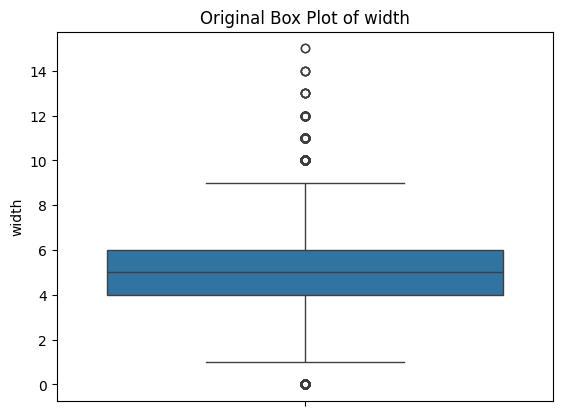

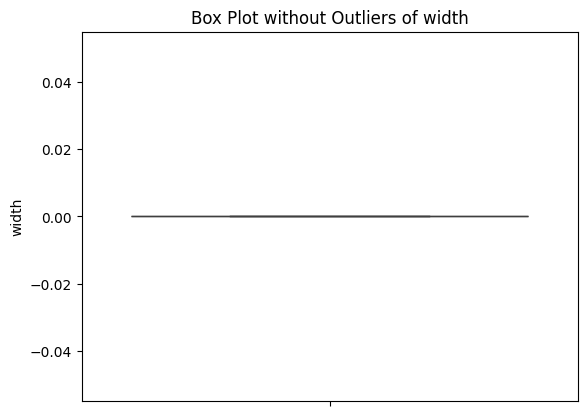

In [ ]:
no_outliers=removal_box_plot(df,'width',threshold_value)

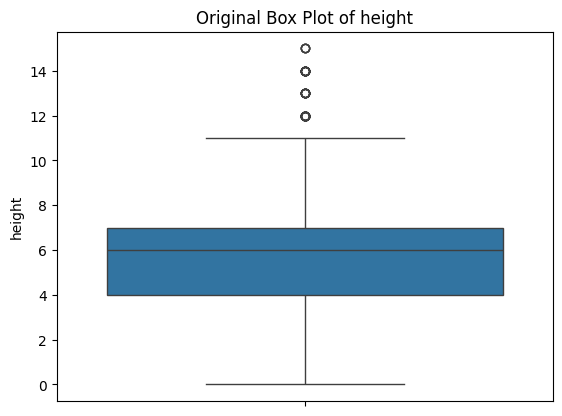

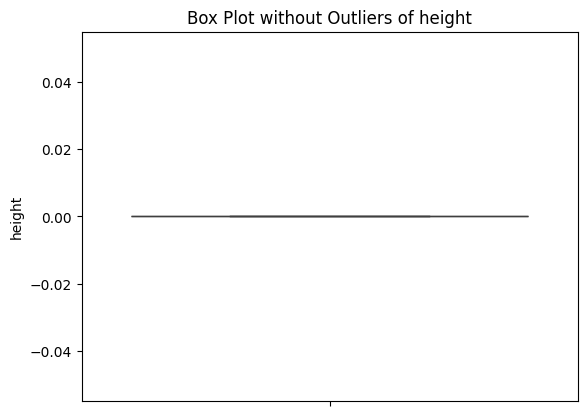

In [ ]:
no_outliers=removal_box_plot(df,'height',threshold_value)

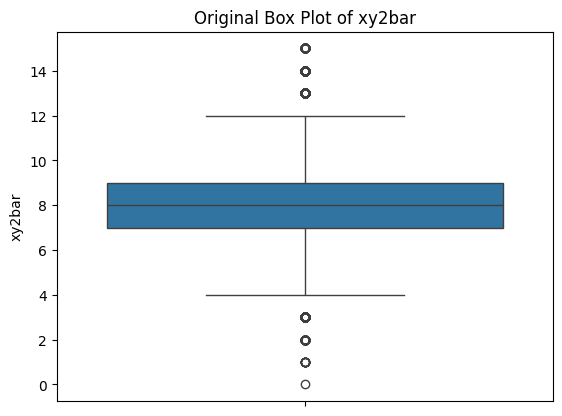

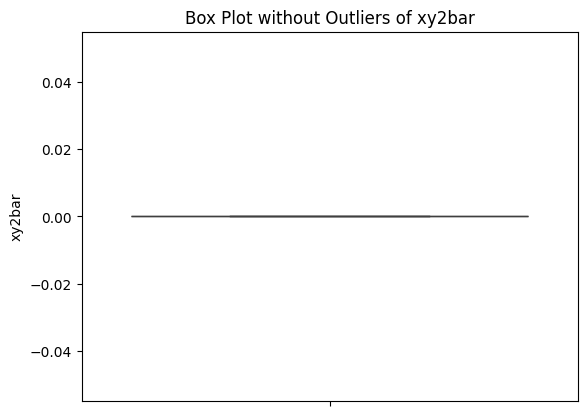

In [ ]:
no_outliers=removal_box_plot(df,'xy2bar',threshold_value)

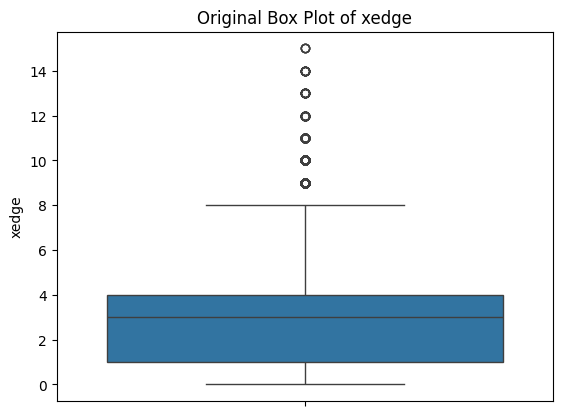

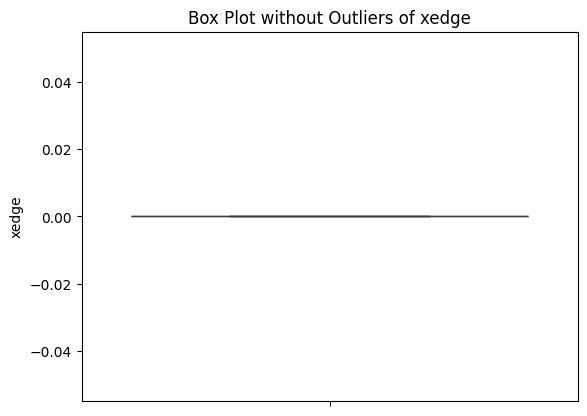

In [ ]:
no_outliers=removal_box_plot(df,'xedge',threshold_value)

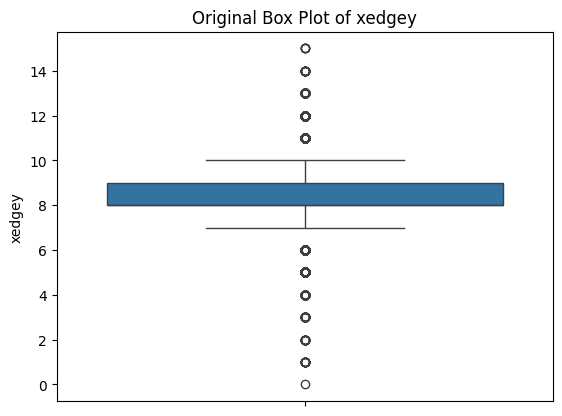

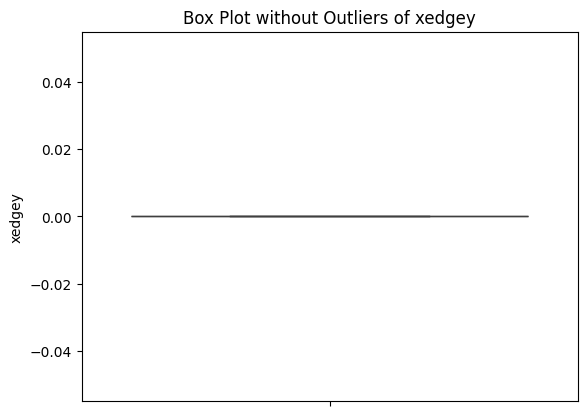

In [ ]:
no_outliers=removal_box_plot(df,'xedgey',threshold_value)

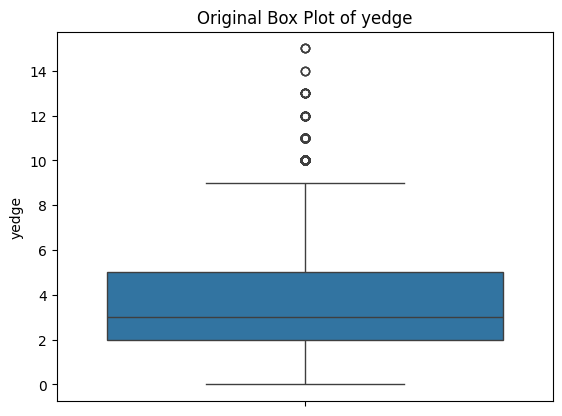

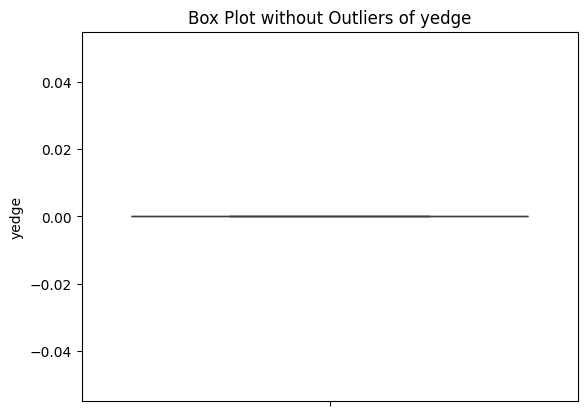

In [ ]:
no_outliers=removal_box_plot(df,'yedge',threshold_value)

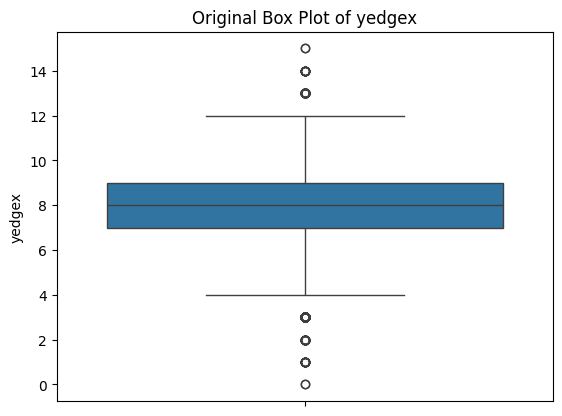

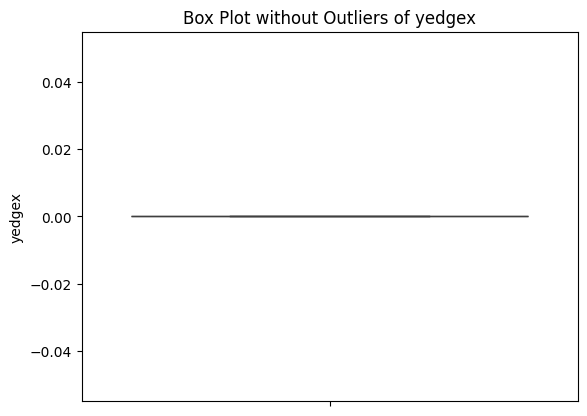

In [ ]:
no_outliers=removal_box_plot(df,'yedgex',threshold_value)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()

In [ ]:
features=std_sca.fit_transform(features)
features

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [ ]:
from sklearn.model_selection  import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15000, 16)
(15000, 26)
(5000, 16)
(5000, 26)


In [ ]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [ ]:
y_train[5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
print(x_train.shape)

(15000, 16)


In [ ]:
y_train=y_train.reshape(15000,52)
y_test=y_test.reshape(5000,52)
y_train=y_train.astype('float')
y_test=y_test.astype('float')
y_train/=255
y_test/=255

In [132]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15000, 16)
(15000, 52)
(5000, 16)
(5000, 52)


In [ ]:
print(y_train.shape)

(15000, 52)


In [ ]:
print(y_test.shape)

(5000, 52)


In [133]:
print(x_test.shape)

(5000, 16)


In [134]:
np.unique(y_test)

array([0.        , 0.00392157])

In [135]:
epochs=5
batch_size=1500
n_classes=52

In [136]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 600)               10200     
                                                                 
 dropout_5 (Dropout)         (None, 600)               0         
                                                                 
 dense_11 (Dense)            (None, 600)               360600    
                                                                 
 dropout_6 (Dropout)         (None, 600)               0         
                                                                 
 dense_12 (Dense)            (None, 52)                31252     
                                                                 
Total params: 402052 (1.53 MB)
Trainable params: 402052 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [138]:
y_train=y_train.reshape(15000,52)
y_test=y_test.reshape(5000,52)
y_train=y_train.astype('float')
y_test=y_test.astype('float')
y_train/=255
y_test/=255

In [139]:
history=model.fit(x_train,y_train,epochs=10,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 0.3491 - accuracy: 0.0019 - val_loss: 0.0742 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.0383 - accuracy: 0.0041 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0118 - accuracy: 0.0075 - val_loss: 0.0076 - val_accuracy: 2.0000e-04
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.0123 - val_loss: 0.0043 - val_accuracy: 0.0014
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.0159 - val_loss: 0.0028 - val_accuracy: 0.0034
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 0.0180 - val_loss: 0.0020 - val_accuracy: 0.0058
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.0187 - val_loss: 0.0015 - val_accuracy: 0.0076
Epoch 

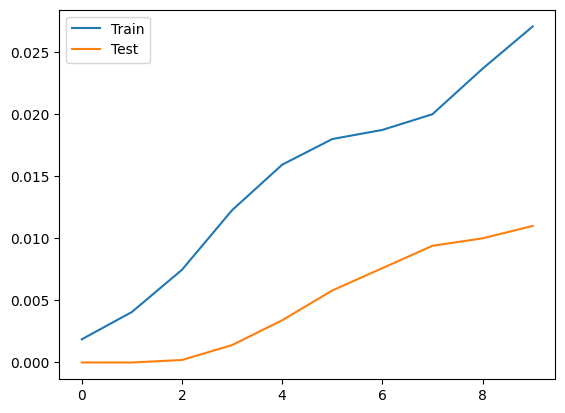

In [140]:
plt.plot(range(10),history.history['accuracy'],label='Train')
plt.plot(range(10),history.history['val_accuracy'],label='Test')
plt.legend(loc='best')

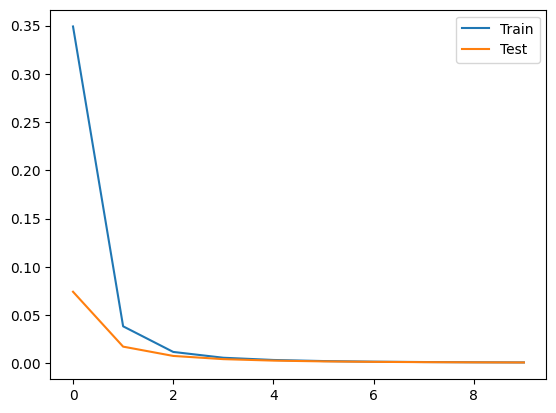

In [141]:
plt.plot(range(10),history.history['loss'],label='Train')
plt.plot(range(10),history.history['val_loss'],label='Test')
plt.legend(loc='best')

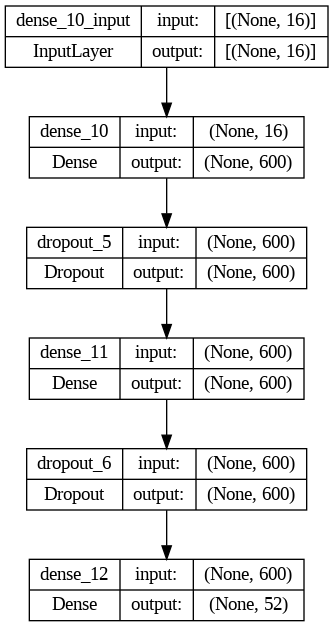

In [142]:
plot_model(model,show_shapes=True)

In [143]:
#parameter Tuning

In [144]:
epochs=10
batch_size=2000
n_classes=52

In [145]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(450, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 600)               10200     
                                                                 
 dropout_7 (Dropout)         (None, 600)               0         
                                                                 
 dense_14 (Dense)            (None, 600)               360600    
                                                                 
 dropout_8 (Dropout)         (None, 600)               0         
                                                                 
 dense_15 (Dense)            (None, 450)               270450    
                                                                 
 dropout_9 (Dropout)         (None, 450)               0         
                                                                 
 dense_16 (Dense)            (None, 52)               

In [146]:
model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [147]:
history=model.fit(x_train,y_train,epochs=15,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/15
8/8 [==============================] - 1s 34ms/step - loss: 0.3480 - accuracy: 8.6667e-04 - val_loss: 0.0269 - val_accuracy: 0.0000e+00
Epoch 2/15
8/8 [==============================] - 0s 14ms/step - loss: 0.0140 - accuracy: 0.0024 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 3/15
8/8 [==============================] - 0s 17ms/step - loss: 0.0042 - accuracy: 0.0064 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 4/15
8/8 [==============================] - 0s 18ms/step - loss: 0.0022 - accuracy: 0.0053 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 5/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 0.0076 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 6/15
8/8 [==============================] - 0s 16ms/step - loss: 9.5264e-04 - accuracy: 0.0103 - val_loss: 8.0674e-04 - val_accuracy: 0.0000e+00
Epoch 7/15
8/8 [==============================] - 0s 15ms/step - loss: 7.2632e-04 - accuracy: 0.0125 - val_loss: 6.3599e-04 - val_

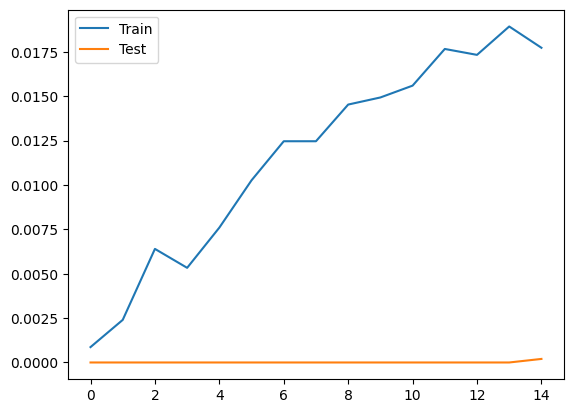

In [148]:
plt.plot(range(15),history.history['accuracy'],label='Train')
plt.plot(range(15),history.history['val_accuracy'],label='Test')
plt.legend(loc='best')

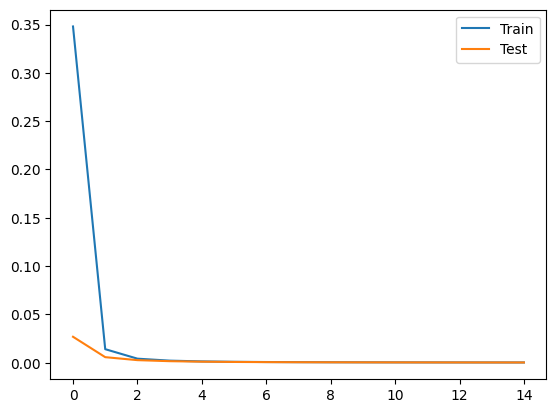

In [149]:
plt.plot(range(15),history.history['loss'],label='Train')
plt.plot(range(15),history.history['val_loss'],label='Test')
plt.legend(loc='best')

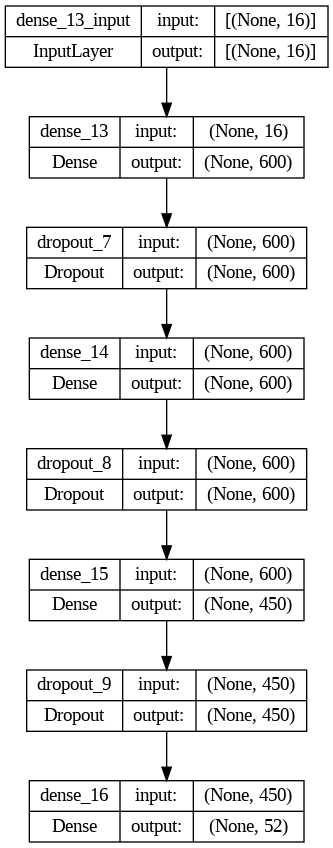

In [150]:
plot_model(model,show_shapes=True)

In [151]:
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import GridSearchCV
scoring = {'accuracy': make_scorer(accuracy_score)}

In [152]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

In [153]:
from sklearn.neural_network import MLPClassifier

# Define the estimator
estimator = MLPClassifier()

# Define the hyperparameter space
params = {
    'batch_size': [100, 20, 50, 25, 32],
    'nb_epoch': [200, 100, 300, 400],
    'unit': [5, 6, 10, 11, 12, 15],
}



In [154]:
grid_search=GridSearchCV(estimator=estimator,param_grid=params,cv=cv,scoring=scoring,refit='accuracy')

In [155]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'batch_size': [100, 20, 50, 25, 32],
                         'nb_epoch': [200, 100, 300, 400],
                         'unit': [5, 6, 10, 11, 12, 15]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score)})

In [156]:
x_test = x_test.reshape((-1, model.input_shape[1]))

In [157]:
y_pred=model.predict(x_test)

157/157 [==============================] - 0s 2ms/step


In [160]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R^2 score: {r2}")

Mean squared error: 0.0004053837188922267
R^2 score: -46365704.58001811
